# **Criando um Web Crawler**

## **Introdução**

___

**Vamos trabalhar com dados semi-estruturados e estruturados**




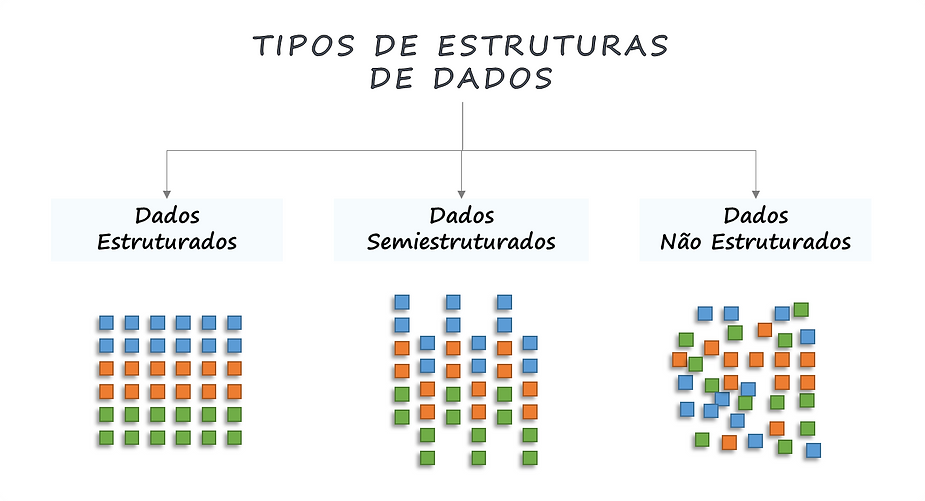

___

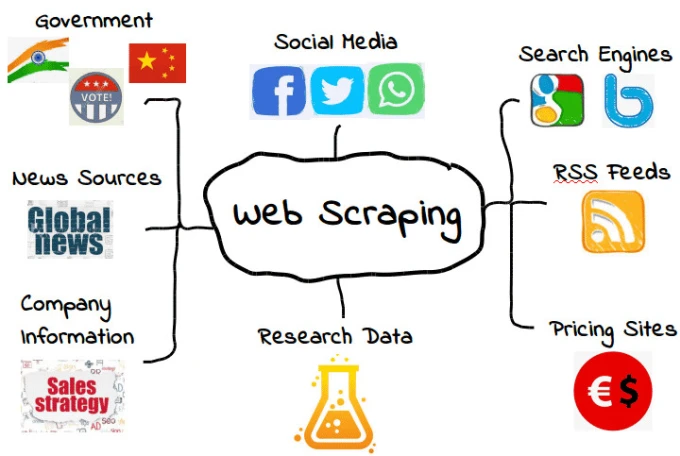

**O que é Web Scarping**
<br>
<br>
Web scraping é a prática de extrair informações diretamente de páginas da web. Essa extração geralmente envolve a coleta de dados de uma página HTML, e pode incluir textos, imagens, links, dados tabulares e outros tipos de conteúdo. O termo "scraping" refere-se à ideia de "raspar" ou "coletar" dados da web.


**Como fazer?**
1. **Requisição da Página Web**: Um script ou programa envia uma solicitação HTTP para o servidor web que hospeda a página da web que você deseja extrair.

2. **Download do Conteúdo HTML**: O servidor responde à solicitação enviando o conteúdo HTML da página web solicitada.

3. **Análise do HTML**: O conteúdo HTML é analisado para identificar e extrair as informações desejadas. Isso geralmente é feito usando técnicas de parsing HTML.

4. **Extração de Dados**: Os dados específicos que você deseja coletar são extraídos do HTML. Isso pode envolver a busca por tags HTML específicas, classes CSS, identificadores, ou outros elementos que envolvem as informações desejadas.

5. **Armazenamento dos Dados**: Os dados extraídos podem ser armazenados em um formato desejado, como um banco de dados, um arquivo CSV, ou qualquer outro meio de armazenamento que seja útil para o usuário.







___

**Frameworks**:
<br>
<br>
1. **Beautiful Soup**: Uma biblioteca Python para extração de dados de documentos HTML e XML. É conhecida pela sua simplicidade e facilidade de uso. Trabalha bem com parsers como lxml e html5lib.

2. **Selenium**: Embora seja comumente usado para automação de testes, o Selenium também pode ser utilizado para web scraping interativo. Ele permite a automação do navegador, possibilitando a extração de dados de páginas da web que usam JavaScript para renderização.

3. **Requests-HTML**: Uma biblioteca simples e amigável para fazer solicitações HTTP e interagir com o conteúdo HTML de uma página. Oferece uma sintaxe intuitiva para navegar e extrair dados de páginas web.




___

## **Nosso objetivo**
1. Pegar os dados do ranking de filmes
2. Buscar as capas de filmes
3. Elaborar um relatório para mostrar os dados

## **Hands on!**

In [1]:
# Dados
import pandas as pd
import numpy as np

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Gráficos
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Data
from datetime import datetime

# Imagem
from PIL import Image
from io import BytesIO

In [2]:
# Faz o request para a página
url = "https://pt.wikipedia.org/wiki/Lista_de_filmes_de_maior_bilheteria"
response = requests.get(url)
type( response ), response.status_code

(requests.models.Response, 200)

In [3]:
# Ler os dados HTML
soup = BeautifulSoup( response.text, 'html.parser' )
type( soup )

bs4.BeautifulSoup

In [4]:
# Pegando a tabela com os dados do Filmes
HTML_Tabela = 'wikitable sortable plainrowheaders'
Dados_Tabela = soup.find('table', {'class': HTML_Tabela } )
Dados_Tabela

<table class="wikitable sortable plainrowheaders" style="margin:auto;">
<caption>
</caption>
<tbody><tr>
<th><i>Ranking</i>
</th>
<th>Ano
</th>
<th>Filme
</th>
<th>Distribuidor
</th>
<th>Diretor(a)
</th>
<th>Bilheteria (<a href="/wiki/D%C3%B3lar_dos_Estados_Unidos" title="Dólar dos Estados Unidos">US$</a>)
</th>
<th>Ref.
</th></tr>
<tr>
<td style="text-align:center;">1
</td>
<td>2009
</td>
<td><i><a href="/wiki/Avatar_(filme)" title="Avatar (filme)">Avatar</a></i>
</td>
<td><a href="/wiki/20th_Century_Studios" title="20th Century Studios">20th Century Fox</a>
</td>
<td>James Cameron
</td>
<td style="text-align:right;">2 923 706 026
</td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-avatar_1-0"><a href="#cite_note-avatar-1"><span>[</span>1<span>]</span></a></sup>
</td></tr>
<tr>
<td style="text-align:center;">2
</td>
<td>2019
</td>
<td><i><a class="mw-redirect" href="/wiki/Vingadores:_Ultimato" title="Vingadores: Ultimato">Vingadores: Ultimato</a></i>
</td>
<td><a 

In [6]:
# Buscando Nome e LINKs dos filmes
Link_Localizados = Dados_Tabela.find_all('a')

# Minerando em listas
Nome_Filmes = [ Loop.text for Loop in Link_Localizados ]
Link_Filmes = [ Loop.get('href') for Loop in Link_Localizados ]

# Organizando em um DataFrame
Dicionario = {
    'Nome_Link' : Nome_Filmes,
    'Filme_Link' : Link_Filmes
}

Tabela_LinksNomes = pd.DataFrame( Dicionario )
Tabela_LinksNomes.head()

,Nome_Link,Filme_Link
0,US$,/wiki/D%C3%B3lar_dos_Estados_Unidos
1,Avatar,/wiki/Avatar_(filme)
2,20th Century Fox,/wiki/20th_Century_Studios
3,[1],#cite_note-avatar-1
4,Vingadores: Ultimato,/wiki/Vingadores:_Ultimato


In [7]:
# Buscando os dados do Wikipedia
Link_URL = 'https://pt.wikipedia.org/wiki/Lista_de_filmes_de_maior_bilheteria'
Dados_Web = pd.read_html(Link_URL)
type( Dados_Web ), len( Dados_Web )

(list, 12)

In [8]:
Dados_Web[0].head(10)

,Ranking,Ano,Filme,Distribuidor,Diretor(a),Bilheteria (US$),Ref.
0,1,2009,Avatar,20th Century Fox,James Cameron,2 923 706 026,[1]
1,2,2019,Vingadores: Ultimato,Walt Disney Studios Motion Pictures,Joe Russo / Anthony Russo,2 799 439 100,[2]
2,3,2022,Avatar: O Caminho da Água,20th Century Studios,James Cameron,2 320 250 281,[3]
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,James Cameron,2 264 743 305,[4]
4,5,2015,Star Wars: O Despertar da Força,Walt Disney Studios Motion Pictures,J.J. Abrams,2 071 310 218,[5]
5,6,2018,Vingadores: Guerra Infinita,Walt Disney Studios Motion Pictures,Joe Russo / Anthony Russo,2 052 415 039,[6]
6,7,2021,Homem-Aranha: Sem Volta para Casa,Columbia Pictures,Jon Watts,1 921 847 111,[7][8]
7,8,2015,Jurassic World,Universal Pictures,Colin Trevorrow,1 671 537 444,[9]
8,9,2019,O Rei Leão,Walt Disney Studios Motion Pictures,Jon Favreau,1 663 075 401,[10]
9,10,2012,Os Vingadores,Walt Disney Studios Motion Pictures,Joss Whedon,1 520 538 536,[11]


In [9]:
Dados_Web[0].shape

(100, 7)

In [10]:
# Cruzando os dados
Tabela_Cruzada = pd.merge( Dados_Web[0], Tabela_LinksNomes, left_on='Filme', right_on='Nome_Link', how='left' )
Tabela_Cruzada.head()

,Ranking,Ano,Filme,Distribuidor,Diretor(a),Bilheteria (US$),Ref.,Nome_Link,Filme_Link
0,1,2009,Avatar,20th Century Fox,James Cameron,2 923 706 026,[1],Avatar,/wiki/Avatar_(filme)
1,2,2019,Vingadores: Ultimato,Walt Disney Studios Motion Pictures,Joe Russo / Anthony Russo,2 799 439 100,[2],Vingadores: Ultimato,/wiki/Vingadores:_Ultimato
2,3,2022,Avatar: O Caminho da Água,20th Century Studios,James Cameron,2 320 250 281,[3],Avatar: O Caminho da Água,/wiki/Avatar:_O_Caminho_da_%C3%81gua
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,James Cameron,2 264 743 305,[4],Titanic,/wiki/Titanic_(filme_de_1997)
4,5,2015,Star Wars: O Despertar da Força,Walt Disney Studios Motion Pictures,J.J. Abrams,2 071 310 218,[5],Star Wars: O Despertar da Força,/wiki/Star_Wars:_Episode_VII_-_The_Force_Awakens


In [11]:
# Ajustando o link
Tabela_Cruzada['Filme_Link'] = Tabela_Cruzada['Filme_Link'].apply( lambda Loop: 'https://pt.wikipedia.org' + str(Loop) )

Tabela_Cruzada.head()

,Ranking,Ano,Filme,Distribuidor,Diretor(a),Bilheteria (US$),Ref.,Nome_Link,Filme_Link
0,1,2009,Avatar,20th Century Fox,James Cameron,2 923 706 026,[1],Avatar,https://pt.wikipedia.org/wiki/Avatar_(filme)
1,2,2019,Vingadores: Ultimato,Walt Disney Studios Motion Pictures,Joe Russo / Anthony Russo,2 799 439 100,[2],Vingadores: Ultimato,https://pt.wikipedia.org/wiki/Vingadores:_Ulti...
2,3,2022,Avatar: O Caminho da Água,20th Century Studios,James Cameron,2 320 250 281,[3],Avatar: O Caminho da Água,https://pt.wikipedia.org/wiki/Avatar:_O_Caminh...
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,James Cameron,2 264 743 305,[4],Titanic,https://pt.wikipedia.org/wiki/Titanic_(filme_d...
4,5,2015,Star Wars: O Despertar da Força,Walt Disney Studios Motion Pictures,J.J. Abrams,2 071 310 218,[5],Star Wars: O Despertar da Força,https://pt.wikipedia.org/wiki/Star_Wars:_Episo...


In [12]:
def Localizando_Imagens( Link_URL ):

  '''
  Essa função irá buscar aos imagens dentro de uma URL
  '''

  try:

    # Faz o request para a página
    url = Link_URL
    response = requests.get( str(url) )

    soup = BeautifulSoup( response.text, 'html.parser' )

    HTML_Tabela = 'infobox infobox_v2'
    Dados_Tabela = soup.find('table', {'class': HTML_Tabela} )

    # Encontre todas as tags de imagem na página
    imagens = Dados_Tabela.find_all('img')[0]
    Link = imagens.get('src')

    return Link

  except:
    return 'Erro_Processamento'

#Tabela_Cruzada['Filme_Link'].head().apply( Localizando_Imagens )
Tabela_Cruzada['Link_FotoCappa'] = Tabela_Cruzada['Filme_Link'].apply( Localizando_Imagens )

In [13]:
Tabela_Cruzada.head()

,Ranking,Ano,Filme,Distribuidor,Diretor(a),Bilheteria (US$),Ref.,Nome_Link,Filme_Link,Link_FotoCappa
0,1,2009,Avatar,20th Century Fox,James Cameron,2 923 706 026,[1],Avatar,https://pt.wikipedia.org/wiki/Avatar_(filme),//upload.wikimedia.org/wikipedia/pt/thumb/b/b0...
1,2,2019,Vingadores: Ultimato,Walt Disney Studios Motion Pictures,Joe Russo / Anthony Russo,2 799 439 100,[2],Vingadores: Ultimato,https://pt.wikipedia.org/wiki/Vingadores:_Ulti...,//upload.wikimedia.org/wikipedia/pt/thumb/9/9b...
2,3,2022,Avatar: O Caminho da Água,20th Century Studios,James Cameron,2 320 250 281,[3],Avatar: O Caminho da Água,https://pt.wikipedia.org/wiki/Avatar:_O_Caminh...,//upload.wikimedia.org/wikipedia/pt/thumb/5/54...
3,4,1997,Titanic,Paramount Pictures / 20th Century Fox,James Cameron,2 264 743 305,[4],Titanic,https://pt.wikipedia.org/wiki/Titanic_(filme_d...,//upload.wikimedia.org/wikipedia/pt/thumb/2/22...
4,5,2015,Star Wars: O Despertar da Força,Walt Disney Studios Motion Pictures,J.J. Abrams,2 071 310 218,[5],Star Wars: O Despertar da Força,https://pt.wikipedia.org/wiki/Star_Wars:_Episo...,//upload.wikimedia.org/wikipedia/pt/thumb/a/ae...


In [14]:
Tabela_Cruzada[ Tabela_Cruzada.Link_FotoCappa == 'Erro_Processamento' ]

,Ranking,Ano,Filme,Distribuidor,Diretor(a),Bilheteria (US$),Ref.,Nome_Link,Filme_Link,Link_FotoCappa
18,18,2011,Harry Potter e as Relíquias da Morte: Parte 2,Warner Bros. Pictures,David Yates,1 342 359 942,[20],NaN,https://pt.wikipedia.orgnan,Erro_Processamento
73,72,2021,The Battle at Lake Changjin,CMC Pictures,Chen Kaige / Tsui Hark / Dante Lam,902 548 476,[76],NaN,https://pt.wikipedia.orgnan,Erro_Processamento
97,96,2021,"Hi, Mom",China Film Group,Jia Ling,822 009 764,[100],"Hi, Mom","https://pt.wikipedia.org/w/index.php?title=Hi,...",Erro_Processamento


In [15]:
Tabela_Cruzada.dtypes

Ranking              int64
Ano                  int64
Filme               object
Distribuidor        object
Diretor(a)          object
Bilheteria (US$)    object
Ref.                object
Nome_Link           object
Filme_Link          object
Link_FotoCappa      object
dtype: object

In [16]:
Tabela_Cruzada.iloc[50]

Ranking                                                            50
Ano                                                              2001
Filme                                Harry Potter e a Pedra Filosofal
Distribuidor                                    Warner Bros. Pictures
Diretor(a)                                             Chris Columbus
Bilheteria (US$)                                        1 023 842 938
Ref.                                                             [52]
Nome_Link                            Harry Potter e a Pedra Filosofal
Filme_Link          https://pt.wikipedia.org/wiki/Harry_Potter_e_a...
Link_FotoCappa      //upload.wikimedia.org/wikipedia/pt/thumb/1/1d...
Name: 50, dtype: object

In [17]:
Ranking_Mundial = 0

In [18]:
Tabela_Cruzada.Link_FotoCappa[Ranking_Mundial]

'//upload.wikimedia.org/wikipedia/pt/thumb/b/b0/Avatar-Teaser-Poster.jpg/250px-Avatar-Teaser-Poster.jpg'

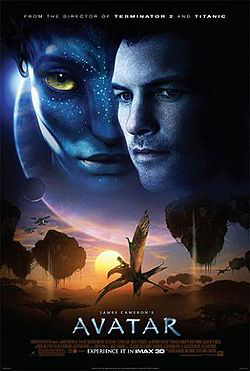

In [19]:
# URL da imagem
url =  'https:' + str( Tabela_Cruzada.Link_FotoCappa[Ranking_Mundial] )

# Faz o request para a imagem
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)

#response = requests.get( url )
img = Image.open( BytesIO( response.content ) )

# Exibe a imagem
img

In [20]:
url

'https://upload.wikimedia.org/wikipedia/pt/thumb/b/b0/Avatar-Teaser-Poster.jpg/250px-Avatar-Teaser-Poster.jpg'

In [21]:
Tabela_Cruzada.iloc[14].T.index

Index(['Ranking', 'Ano', 'Filme', 'Distribuidor', 'Diretor(a)',
       'Bilheteria (US$)', 'Ref.', 'Nome_Link', 'Filme_Link',
       'Link_FotoCappa'],
      dtype='object')

In [23]:
# Criação do relatório

Relatorio = make_subplots(
    rows=1, cols=2,
    subplot_titles=['Capa Filme', 'Informações'],
    specs=[ [ {'type': 'scatter'}, {'type': 'table'} ] ]
)

Relatorio.update_layout(
    width=1200, height=800,
    title='Campeões de bilheteria',
    title_x=0.5
)

Relatorio.update_traces(
    showlegend=False
)

# Definir constantes para a largura e escala da imagem
img_width = 1200
img_height = 1600
scale_factor = 0.5

# Adicionado a imagem
Relatorio.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    ),
    row=1, col=1
)

Relatorio.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor],
    row=1, col=1
)

Relatorio.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    scaleanchor="x",
    row=1, col=1
)

# Add image
Relatorio.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=url)
)

Relatorio.add_trace(
    go.Table(

        # Coluna
        header=dict(
            values=['Informação', 'Descrição'],
            align='left',
            line_color='darkslategray',
            fill_color='royalblue',
            font=dict(color='white', size=12),
            height=40
        ),

        # Linhas
        cells=dict(
            values=[ Tabela_Cruzada.iloc[Ranking_Mundial].T.index[0:6], Tabela_Cruzada.iloc[Ranking_Mundial].T.values[0:6] ], line_color='darkslategray',
            fill=dict( color=['paleturquoise', 'white'] ),
            font_size=12, height=50
        )

    ), row=1, col=2
)

Relatorio